In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('pollution_2000_2021.csv')
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [ ]:
df.head()

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [ ]:
df = df[df['City'] == 'New York']

# filter to Date
df= df[df['Date'] >= '2013-01-01']

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df = df.resample('W').mean()

<ipython-input-29-282a41734846>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('W').mean()


In [ ]:
df = df.reset_index()

In [ ]:
df

,Date,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2013-01-06,2013.0,1.000000,3.500000,0.018833,0.024333,11.833333,22.333333,0.403808,0.475000,7.083333,5.416667,5.024175,8.433333,13.916667,11.666667,22.586079,33.916667,8.750000,31.666667
1,2013-01-13,2013.0,1.000000,10.000000,0.010307,0.019071,12.571429,17.642857,0.448564,0.685714,8.500000,7.857143,4.643258,9.878571,8.714286,13.285714,30.006172,46.078571,13.357143,43.500000
2,2013-01-20,2013.0,1.000000,17.000000,0.018197,0.022714,13.214286,21.142857,0.356803,0.450000,6.714286,5.214286,3.332421,6.371429,10.142857,8.571429,19.244075,29.121429,11.142857,27.000000
3,2013-01-27,2013.0,1.000000,24.000000,0.018437,0.024929,11.214286,23.142857,0.344643,0.428571,8.071429,4.928571,5.972411,11.135714,10.428571,15.142857,21.262752,34.842857,13.142857,32.357143
4,2013-02-03,2013.0,1.428571,17.714286,0.015201,0.020143,11.214286,18.642857,0.400099,0.507143,4.571429,5.714286,4.032202,8.042857,11.357143,10.928571,22.973142,33.321429,10.071429,31.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2021-09-05,2021.0,8.714286,10.857143,0.025011,0.034286,10.928571,31.857143,0.288095,0.342857,5.500000,3.857143,0.117884,0.485714,7.357143,0.071429,9.926855,19.921429,9.214286,18.357143
453,2021-09-12,2021.0,9.000000,9.000000,0.033112,0.042000,10.428571,38.928571,0.265278,0.342857,2.928571,3.785714,0.087698,0.300000,12.071429,0.000000,10.269052,21.250000,14.500000,19.571429
454,2021-09-19,2021.0,9.000000,16.000000,0.034222,0.042214,11.071429,39.071429,0.229762,0.271429,3.285714,2.714286,0.143719,0.764286,12.928571,0.357143,8.174820,18.050000,11.500000,16.571429
455,2021-09-26,2021.0,9.000000,23.000000,0.030193,0.038214,9.357143,35.214286,0.237202,0.335714,4.857143,3.785714,0.111899,0.435714,8.714286,0.142857,9.388608,21.500000,9.000000,19.642857


In [ ]:
df=df[['Date','O3 Mean']]
df.head()

,Date,O3 Mean
0,2013-01-06,0.018833
1,2013-01-13,0.010307
2,2013-01-20,0.018197
3,2013-01-27,0.018437
4,2013-02-03,0.015201


In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

<ipython-input-34-df3eb660f625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
452,2021-09-05,0.025011
453,2021-09-12,0.033112
454,2021-09-19,0.034222
455,2021-09-26,0.030193
456,2021-10-03,0.025067


<Axes: xlabel='ds'>

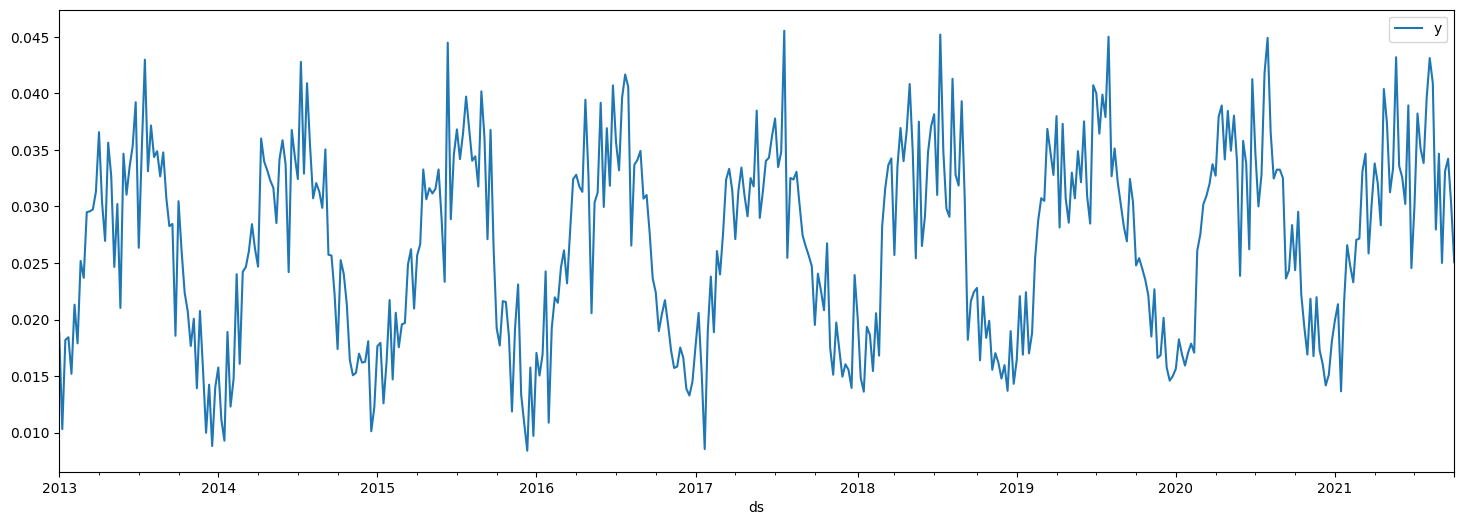

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
train = df[df['ds']<'2021-01-01']
test = df[df['ds']>='2021-01-01']

In [ ]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps2pezxea/7p1vw1yw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps2pezxea/y3jyl4w1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6008', 'data', 'file=/tmp/tmps2pezxea/7p1vw1yw.json', 'init=/tmp/tmps2pezxea/y3jyl4w1.json', 'output', 'file=/tmp/tmps2pezxea/prophet_model4fopq7s0/prophet_model-20240220001210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


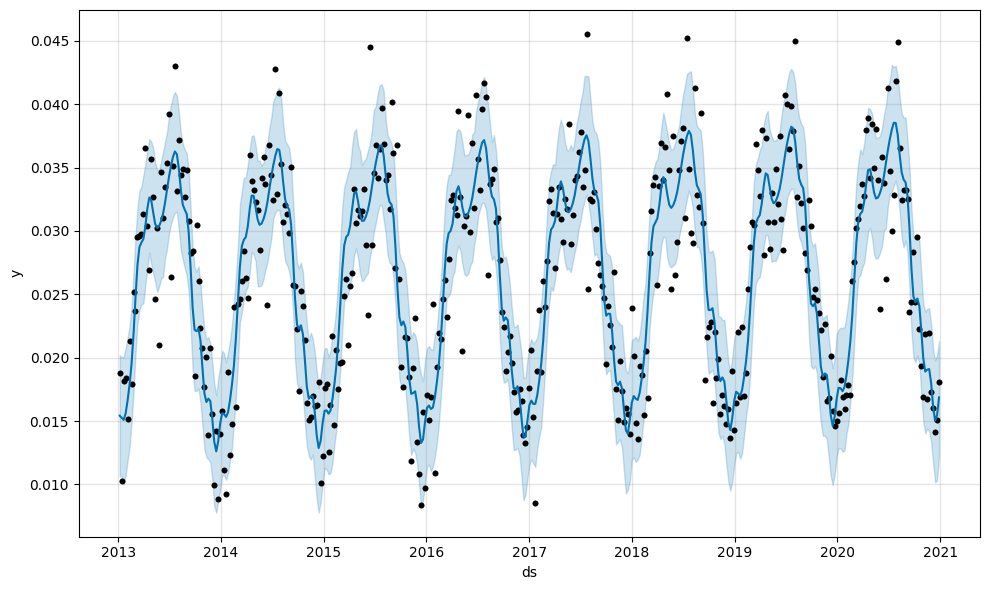

In [ ]:
past_forecast = m.predict(train['ds'].reset_index())
m.plot(past_forecast)
plt.scatter(train['ds'],train['y'],color='k',s=10)

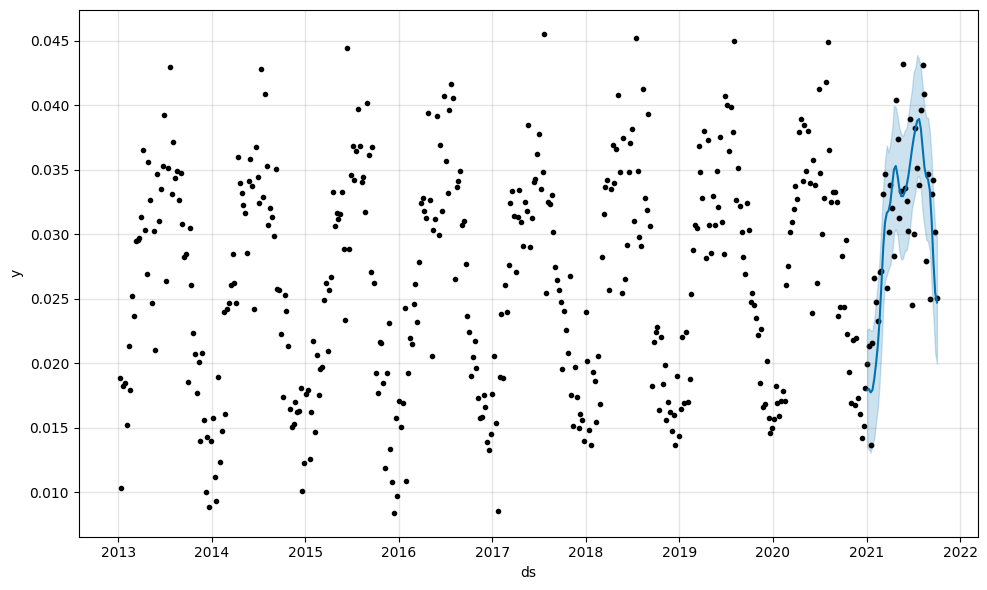

In [ ]:
future_forecast = m.predict(test['ds'].reset_index())
m.plot(future_forecast)
plt.scatter(test['ds'],test['y'],color='k',s=10)

In [ ]:
future_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
((test.reset_index()['y']-future_forecast['yhat'])**2).mean()

2.3375424370175498e-05

In [ ]:
((train.reset_index()['y']-past_forecast['yhat'])**2).mean()

1.3762546356948901e-05

In [ ]:
future_forecast['yhat']

0     0.017903
1     0.018003
2     0.017734
3     0.017928
4     0.018785
5     0.019976
6     0.021395
7     0.023390
8     0.026117
9     0.028965
10    0.030933
11    0.031657
12    0.031838
13    0.032482
14    0.033805
15    0.035036
16    0.035306
17    0.034565
18    0.033546
19    0.032964
20    0.032956
21    0.033270
22    0.033761
23    0.034500
24    0.035494
25    0.036544
26    0.037454
27    0.038219
28    0.038820
29    0.038948
30    0.038203
31    0.036692
32    0.035202
33    0.034472
34    0.034264
35    0.033421
36    0.031105
37    0.027908
38    0.025445
39    0.024712
Name: yhat, dtype: float64

In [ ]:
test.reset_index()['y']

0     0.019931
1     0.021358
2     0.013655
3     0.021550
4     0.026581
5     0.024748
6     0.023293
7     0.027050
8     0.027163
9     0.033128
10    0.034668
11    0.025849
12    0.030197
13    0.033811
14    0.032058
15    0.028339
16    0.040391
17    0.037416
18    0.031258
19    0.033361
20    0.043202
21    0.033584
22    0.032584
23    0.030226
24    0.038941
25    0.024550
26    0.030013
27    0.038223
28    0.035123
29    0.033845
30    0.039626
31    0.043129
32    0.040920
33    0.027961
34    0.034670
35    0.025011
36    0.033112
37    0.034222
38    0.030193
39    0.025067
Name: y, dtype: float64

In [ ]:
(())